## Pip Install

In [ ]:
# !pip install plotly
# !pip install dash
# !pip install wordcloud
# !pip install cufflinks
# !pip install missingno

In [1]:
from plotly.offline import init_notebook_mode, iplot, plot

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import os

#plotly
import plotly as py
init_notebook_mode(connected = True)
import plotly.graph_objs as go
import plotly.express as px

#dash
from dash import Dash, dcc, html, Input, Output

#word cloud library
from wordcloud import WordCloud

# matplotlib
import matplotlib.pyplot as plt
import cufflinks as cf
cf.go_offline()

#warnings
import warnings
warnings.filterwarnings("ignore")

## Submodules
plotly.express :Plotly Express, high-level interface for data visualization

plotly.graph_objects :Graph Objects, low-level interface to figures, traces and layout

plotly.subplots : Subplots, helper function for layout out multi-plot figures ""

plotly.figure_factory : Figure Factories, helper methods for building specific complex charts ""

plotly.io : I/O, low-level interface for displaying, reading and writing figures

plotly.colors: colorscales and utility functions

plotly.data: built-in datasets for demonstration, educational and test purposes

In [3]:
timesData = pd.read_csv("https://raw.githubusercontent.com/arnaudbenard/university-ranking/master/timesData.csv")

In [4]:
timesData.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


In [8]:
timesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   object 
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   object 
 8   total_score             2603 non-null   object 
 9   num_students            2544 non-null   object 
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(4), int64(1), object(9)
memor

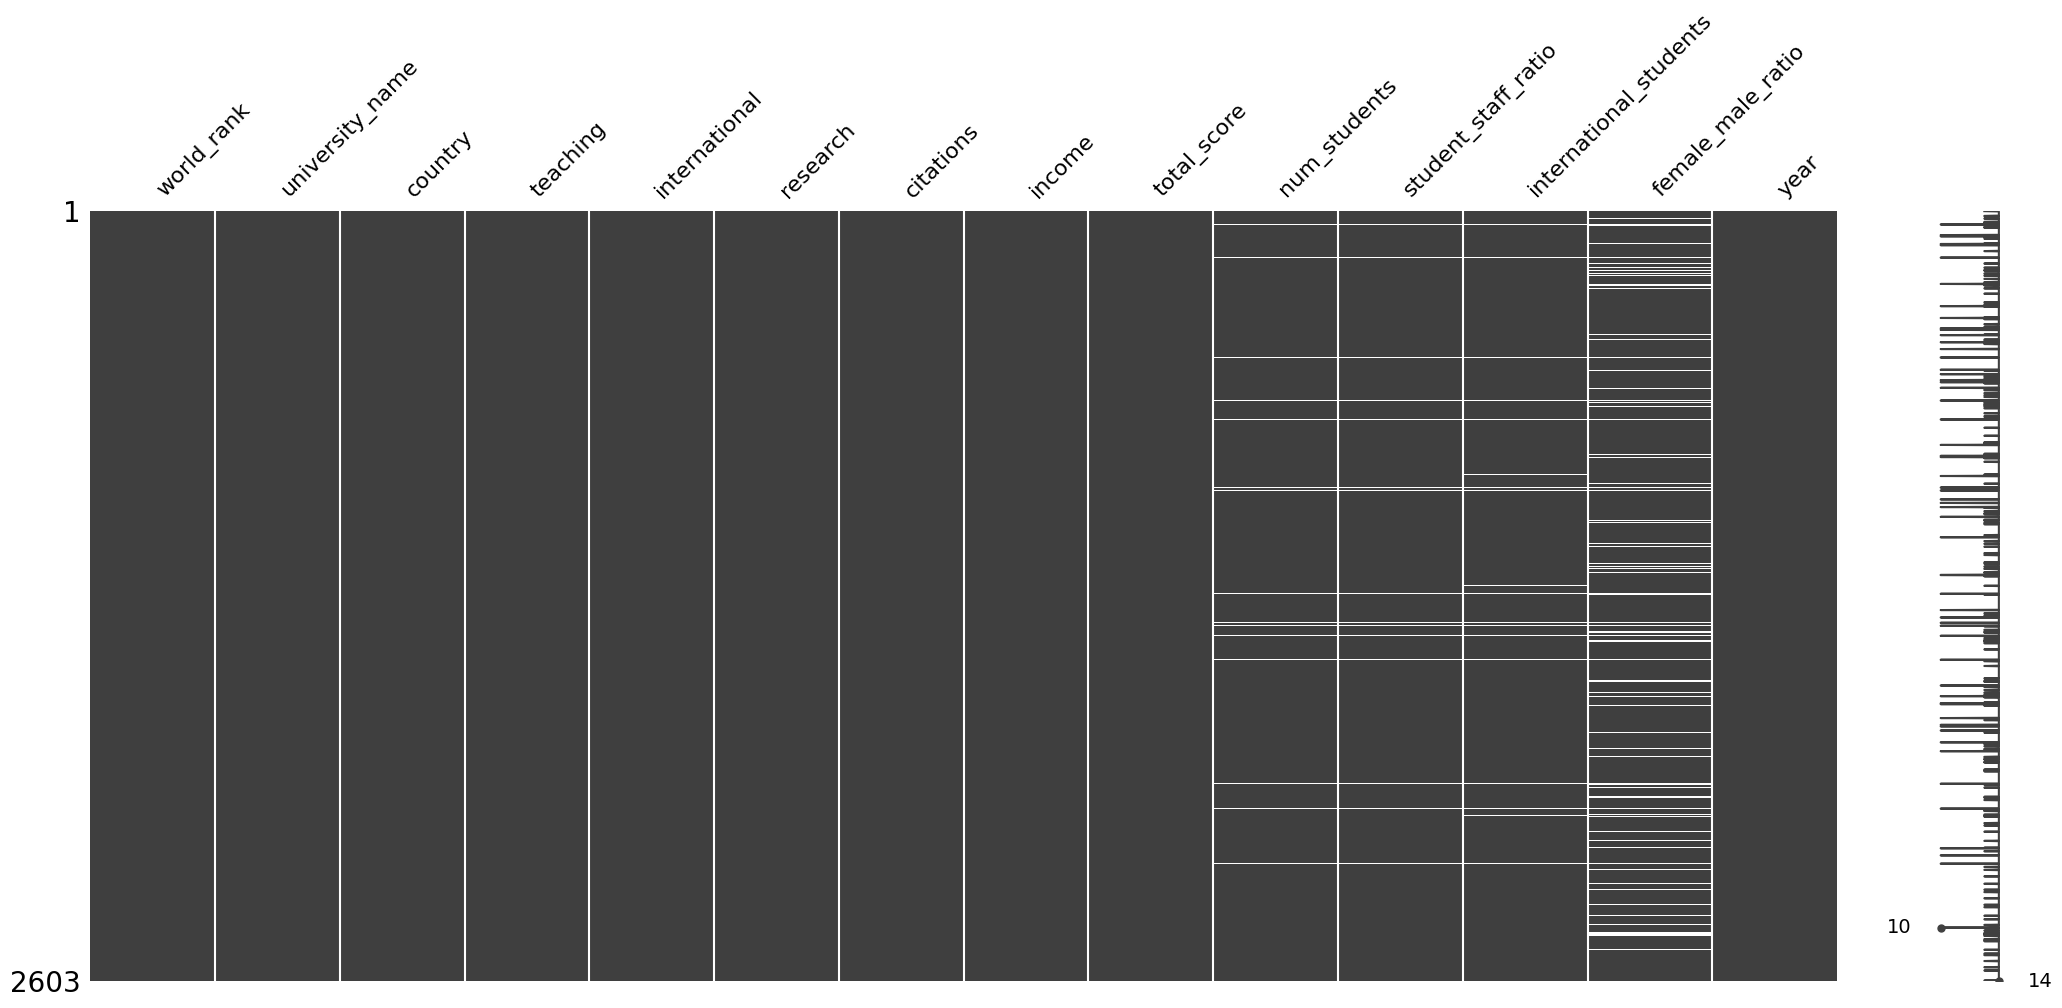

In [5]:
import missingno
missingno.matrix(timesData);

In [6]:
timesData.isnull().sum()

world_rank                  0
university_name             0
country                     0
teaching                    0
international               0
research                    0
citations                   0
income                      0
total_score                 0
num_students               59
student_staff_ratio        59
international_students     67
female_male_ratio         233
year                        0
dtype: int64

# Pyplot Syntax

In [9]:
df = timesData.iloc[:100, :]

In [10]:
df.shape

(100, 14)

In [11]:
import plotly.graph_objs as go

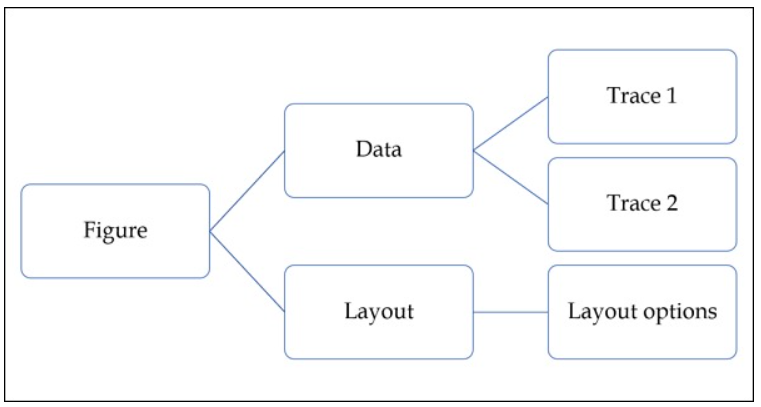

In [13]:
# plt.style.use("ggplot")

trace1 = go.Scatter(x = df.world_rank, 
                  y = df.citations,
                  mode = "lines", 
                  name = "citations",
                  marker = dict(color = "rgb(16,112,2)"),
                  text = df.university_name)

trace2 = go.Scatter(x = df.world_rank, 
                  y = df.teaching,
                  mode = "lines + markers", 
                  name = "teaching",
                  marker = dict(color = "rgb(80,26,80)",
                                size = 10,
                                symbol = "star",
                                line = dict(color = "yellow",
                                           width = 1),),
                   text = df.university_name)

veri = [trace1,trace2]

layout = dict(title = "Citations and Teaching vs Work Rank of Top 100 Universities",
             xaxis = dict(title = "Work Rank", ticklen = 5, tickcolor = "crimson", zeroline = False),
             yaxis = dict(title = "Value", ticklen = 5, tickcolor = "crimson", zeroline = False))

fig = dict(data = veri, layout = layout)

iplot(fig)


## Ticklen Kullanimi

In [14]:
df = px.data.iris()

fig = px.scatter(df, x = "sepal_width", y = "sepal_length", facet_col = "species")
fig.update_xaxes(ticks = "outside", tickwidth = 2, tickcolor = "crimson", ticklen = 20)
fig.update_yaxes(ticks = "outside", tickwidth = 2, tickcolor = "crimson", ticklen = 20, col = 1)

fig.show()

In [15]:
new_data = sns.load_dataset("tips")

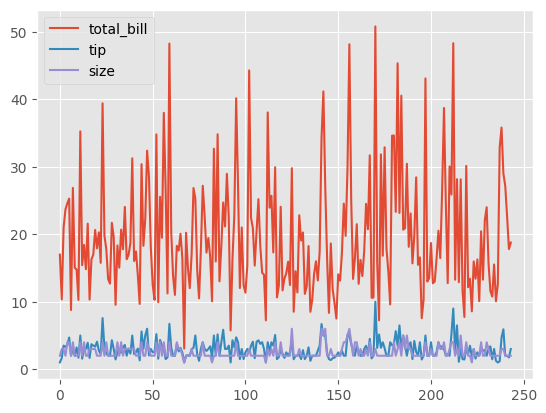

In [16]:
plt.style.use("ggplot")

nd = new_data[["total_bill", "tip", "size"]]
nd.plot();

In [17]:
plt.style.use("ggplot")

nd = new_data[["total_bill", "tip", "size"]]
nd.iplot();

## Scatter Charts

In [18]:
df2014 = timesData[timesData.year == 2014].iloc[:100,:]
df2015 = timesData[timesData.year == 2015].iloc[:100,:]
df2016 = timesData[timesData.year == 2016].iloc[:100,:]

In [19]:
trace1 = go.Scatter(x = df2014.world_rank,
                   y = df2014.citations,
                   mode = "markers",
                   name = "2014",
                   marker = dict(color = "rgb(255,128,255)"),
                   text = df2014.university_name)

trace2 = go.Scatter(x = df2015.world_rank,
                   y = df2015.citations,
                   mode = "markers",
                   name = "2015",
                   marker = dict(color = "rgb(255,128,2)"),
                   text = df2015.university_name)

trace3 = go.Scatter(x = df2016.world_rank,
                   y = df2016.citations,
                   mode = "markers",
                   name = "2016",
                   marker = dict(color = "green"),
                   text = df2016.university_name)

data = [trace1, trace2, trace3]

layout = dict(title = "Citation vs World Rank of Top 100 Universities with 2014, 2015, 2016",
             title_x = 0.5, 
             title_y = 0.9,
             xaxis = dict(title = "World Rank"),
             yaxis = dict(title = "Citation"))

fig = dict(data = data, layout = layout)

iplot(fig)

## Bar Charts

In [21]:
gm = px.data.gapminder()
gm

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716


In [23]:
gm_usa = px.data.gapminder().query("country == 'United States'")
px.bar(gm_usa, x = "year", y = "pop")

In [24]:
gm_turkey = px.data.gapminder().query("country == 'Turkey'")
px.bar(gm_turkey, x = "year", y = "pop")

In [25]:
df_tips = px.data.tips()
px.bar(df_tips, x = "day", y = "tip", color = "sex",
      title = "Tip by Sex on Each Day",
      labels = dict(tip = "Tip Amonut", day = "Day of the Week"))

In [27]:
df_tips = px.data.tips()
fig = px.bar(df_tips, x = "day", y = "tip", color = "sex",
      title = "Tip by Sex on Each Day",
      labels = dict(tip = "Tip Amonut", day = "Day of the Week"))

fig.update_layout(font_family = "Courier New",
                 font_color = "blue",
                 title_font_family = "Arial",
                 title_font_color = "red",
                 legend_title_font_color = "green")

In [28]:
df_tips = px.data.tips()
fig = px.bar(df_tips, x = "day", y = "tip", color = "sex",
      title = "Tip by Sex on Each Day",
      labels = dict(tip = "Tip Amount", day = "Day of the Week"))
fig.update_layout(
    font_family="Courier New",
    font_color="blue",
    title_font_family="Arial",
    title_font_color="red",
    legend_title_font_color="green",
    title_x = 0.5,
    title_y = 0.85)

In [29]:
df=px.data.gapminder()
df_europe = px.data.gapminder().query("continent == 'Europe' and year == 2007 and pop > 60.e6")
fig =px.bar(df_europe, y = "pop", x = "country", text = "pop", color = "country")
fig

In [31]:
df_europe = px.data.gapminder().query("continent == 'Europe' and year == 2007 and pop > 5.e6")
fig =px.bar(df_europe, y = "pop", x = "country", text = "pop", color = "country")

fig.update_traces(textposition = "outside", texttemplate = "%{text:.3s}", textfont_size = 12)
fig.update_layout(xaxis_tickangle = -45,
                 font_family = "Arial",
                 font_color = "red",
                 font_size = 12)

## Pie Charts

In [32]:
df2016 = timesData[timesData.year == 2016].iloc[:7,:]

df = df2016.num_students
df.count()


7

In [35]:
df

1803     2,243
1804    19,919
1805    15,596
1806    18,812
1807    11,074
1808    20,152
1809     7,929
Name: num_students, dtype: object

In [33]:
df1 = (df.str.replace(",","")).astype("float")

In [34]:
df2 = list((df.str.replace(",","")).astype("float"))

In [36]:
df2

[2243.0, 19919.0, 15596.0, 18812.0, 11074.0, 20152.0, 7929.0]

In [37]:
pie_list = [float(each.replace(",","")) for each in df2016.num_students]
pie_list

[2243.0, 19919.0, 15596.0, 18812.0, 11074.0, 20152.0, 7929.0]

In [46]:
labels = df2016.university_name
# figure
fig = {
    "data" : [
        {
            "values" : pie_list,
            "labels" : labels,
            "domain" : {"x": [0, .5]},  # grafigi figure icinde x ekseninde hareket ettirmek icin
            "name" : "Number Of Students Rates",
            "hoverinfo" : "label + percent",
            "hole" : .2,
            "type" : "pie",
            "pull" : [0,0,0,0,0, 0.2, 0.2] #exploded
        },
    ],
    "layout" : {
        "title" : "Universites Number of Students rates",
        "annotations" : [
            {"font" : {"size" : 20},
             "text" : "Number of Students",
             "x" : 0.3,
             "y" : 1
            },
        ]
    }
}
iplot(fig)

## Bubble Charts

In [47]:
df2016 = timesData[timesData.year == 2016].iloc[:20,:]
num_students_size = [float(each.replace(",", ".")) for each in df2016.num_students]
num_students_size

[2.243,
 19.919,
 15.596,
 18.812,
 11.074,
 20.152,
 7.929,
 15.06,
 18.178,
 14.221,
 15.128,
 11.751,
 36.186,
 26.607,
 25.055,
 38.206,
 20.376,
 21.424,
 66.198,
 15.172]

In [48]:
df2016.international
international_color = [float(each) for each in df2016.international]
data = [{
    "y": df2016.teaching,
    "x": df2016.world_rank,
    "mode":"markers",
    "marker":{
        "color": international_color,
        "size": num_students_size,
        "showscale": True
    },
    "text":df2016.university_name
}
]
iplot(data)

## Word Cloud

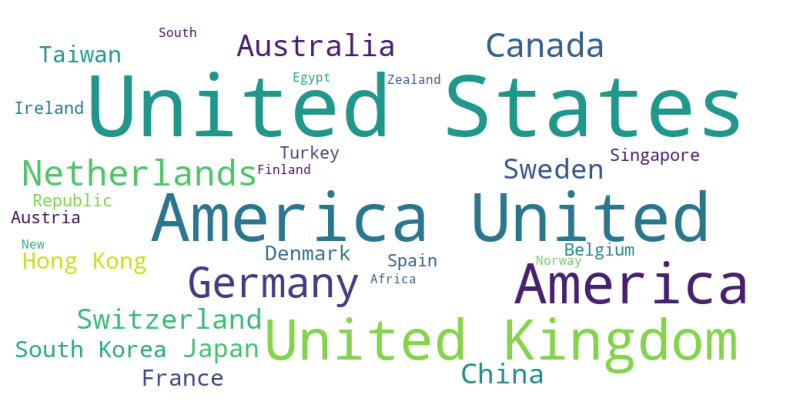

In [49]:
x2011 = timesData.country[timesData.year == 2011]
plt.subplots(figsize = (10,5))
wordcloud = WordCloud(background_color = "white",
                     width = 1000,
                     height = 500).generate(" ".join(x2011))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("grph.png")
plt.show()

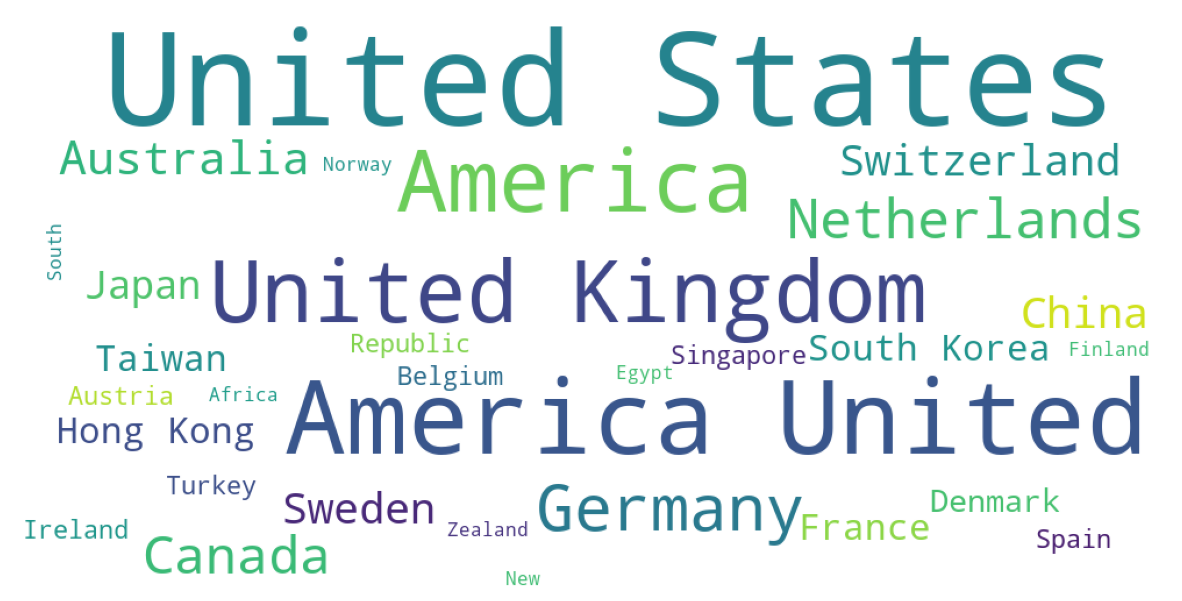

In [50]:
x2011 = timesData.country[timesData.year == 2011]
plt.subplots(figsize = (15, 15))
wordcloud = WordCloud(background_color = "white",
                     width = 1000,
                     height = 500).generate(" ".join(x2011))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("grph.png")
plt.show()

In [51]:
trace1 = go.Scatter3d(
                    x = df2015.world_rank,
                    y = df2015.research,
                    z = df2015.citations,
                    mode = "markers",
                    marker = dict(size = 7, color = "rgb(255, 0, 0)",))
data = [trace1]
layout = go.Layout()
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [52]:
df_5 = px.data.tips()

In [53]:
fig = px.scatter_3d(df_5, x='size', y='total_bill', z='tip',
                    color='day', symbol='sex')
fig.show()